# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
City = []
Cloudiness = []
Country = []
Date_Unix = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
Date_Time = []
count_queries = 0
count_success = 0
set = 1
url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    #temperature in Fahrenheit; units=imperial
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    count_queries = count_queries + 1
    count_success = count_success + 1
   
    print("Processing Record " + str(count_queries) + " of Set " +str(set)+ " | " + city)
    try:
        weather_response = requests.get(query_url).json()
        
        City.append(weather_response["name"])
        Cloudiness.append(weather_response["clouds"]["all"])
        Country.append(weather_response["sys"]["country"])
        Date_Unix.append(weather_response["dt"])
        Humidity.append(weather_response["main"]["humidity"])
        Lat.append(weather_response["coord"]["lat"])
        Lng.append(weather_response["coord"]["lon"])
        Max_Temp.append(weather_response["main"]["temp_max"])
        Wind_Speed.append(weather_response["wind"]["speed"])
        Date_Time.append(datetime.fromtimestamp(weather_response["dt"]))  
    except KeyError:
        print(city + " not found. Skipping...")
        count_success = count_success - 1
 
if count_success < 500:
    print("")
    print("Information on only " + str(count_success) + " cities found. This less than 500.")

if count_success > 500:
    print("")
    print("Information on " + str(count_success) + " cities found. This greater than 500.")
 
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | la tuque
Processing Record 2 of Set 1 | sao miguel do araguaia
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | kruisfontein
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | aranos
Processing Record 13 of Set 1 | camacha
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | guiyang
Processing Record 16 of Set 1 | colares
Processing Record 17 of Set 1 | illoqqortoormiut
illoqqortoormiut not found. Skipping...
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | garissa
Processing Record 21 of Set 1 | tessalit
Processing Record 22 of S

Processing Record 179 of Set 1 | benxi
Processing Record 180 of Set 1 | san policarpo
Processing Record 181 of Set 1 | taoudenni
Processing Record 182 of Set 1 | borgosesia
Processing Record 183 of Set 1 | caravelas
Processing Record 184 of Set 1 | kaitangata
Processing Record 185 of Set 1 | luderitz
Processing Record 186 of Set 1 | havelock
Processing Record 187 of Set 1 | sangar
Processing Record 188 of Set 1 | guatire
Processing Record 189 of Set 1 | madingou
Processing Record 190 of Set 1 | ondorhaan
ondorhaan not found. Skipping...
Processing Record 191 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 192 of Set 1 | truro
Processing Record 193 of Set 1 | shellbrook
Processing Record 194 of Set 1 | oranjestad
Processing Record 195 of Set 1 | kamenka
Processing Record 196 of Set 1 | jahrom
jahrom not found. Skipping...
Processing Record 197 of Set 1 | varkkallai
Processing Record 198 of Set 1 | nanortalik
Processing Record 199 of Set 1 | naze
Processing Record 200 of Set 1 | t

Processing Record 358 of Set 1 | erdenet
Processing Record 359 of Set 1 | fukue
Processing Record 360 of Set 1 | codrington
Processing Record 361 of Set 1 | fevralsk
fevralsk not found. Skipping...
Processing Record 362 of Set 1 | tilichiki
Processing Record 363 of Set 1 | bambous virieux
Processing Record 364 of Set 1 | tyukhtet
Processing Record 365 of Set 1 | lolua
lolua not found. Skipping...
Processing Record 366 of Set 1 | cherskiy
Processing Record 367 of Set 1 | koungou
koungou not found. Skipping...
Processing Record 368 of Set 1 | bad hofgastein
Processing Record 369 of Set 1 | lata
Processing Record 370 of Set 1 | newport
Processing Record 371 of Set 1 | myitkyina
Processing Record 372 of Set 1 | udachnyy
Processing Record 373 of Set 1 | sohagpur
Processing Record 374 of Set 1 | paidha
Processing Record 375 of Set 1 | gunjur
Processing Record 376 of Set 1 | asau
asau not found. Skipping...
Processing Record 377 of Set 1 | warqla
warqla not found. Skipping...
Processing Recor

Processing Record 539 of Set 1 | abu jubayhah
abu jubayhah not found. Skipping...
Processing Record 540 of Set 1 | hit
Processing Record 541 of Set 1 | yichang
Processing Record 542 of Set 1 | ishigaki
Processing Record 543 of Set 1 | mzimba
Processing Record 544 of Set 1 | wanning
Processing Record 545 of Set 1 | comodoro rivadavia
Processing Record 546 of Set 1 | mogadishu
Processing Record 547 of Set 1 | omboue
Processing Record 548 of Set 1 | mubi
Processing Record 549 of Set 1 | sinnamary
Processing Record 550 of Set 1 | camacupa
Processing Record 551 of Set 1 | kishni
Processing Record 552 of Set 1 | krasnoselkup
krasnoselkup not found. Skipping...
Processing Record 553 of Set 1 | morant bay
Processing Record 554 of Set 1 | nanakuli
Processing Record 555 of Set 1 | mobara
Processing Record 556 of Set 1 | vicksburg
Processing Record 557 of Set 1 | kieta
Processing Record 558 of Set 1 | presidencia roque saenz pena
Processing Record 559 of Set 1 | poya
Processing Record 560 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create dataframe
city_weather_df = pd.DataFrame({
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date (Unix)": Date_Unix,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max_Temp (F)": Max_Temp,
    "Wind_Speed": Wind_Speed,
    "Date_Time": Date_Time
})

city_weather_df

,City,Cloudiness,Country,Date (Unix),Humidity,Lat,Lng,Max_Temp (F),Wind_Speed,Date_Time
0,La Tuque,42,CA,1563748187,66,47.44,-72.79,70.71,8.37,2019-07-21 17:29:47
1,Sao Miguel do Araguaia,49,BR,1563748053,34,-13.28,-50.16,83.67,4.56,2019-07-21 17:27:33
2,Mar del Plata,0,AR,1563748188,47,-46.43,-67.52,37.77,3.80,2019-07-21 17:29:48
3,Kruisfontein,0,ZA,1563748188,26,-34.00,24.73,52.89,11.65,2019-07-21 17:29:48
4,Ushuaia,40,AR,1563748188,80,-54.81,-68.31,35.60,26.40,2019-07-21 17:29:48
5,Port Alfred,0,ZA,1563748188,42,-33.59,26.89,57.00,4.00,2019-07-21 17:29:48
6,Mount Gambier,75,AU,1563748189,81,-37.83,140.78,48.20,16.11,2019-07-21 17:29:49
7,Butaritari,10,KI,1563748189,69,3.07,172.79,84.03,5.99,2019-07-21 17:29:49
8,Lebu,40,ET,1563748189,82,8.96,38.73,57.20,11.41,2019-07-21 17:29:49
9,Albany,75,US,1563748189,43,42.65,-73.75,90.00,13.87,2019-07-21 17:29:49


In [6]:
city_weather_df.to_csv(output_data_file, index=False)
city_weather_df.count()

City            548
Cloudiness      548
Country         548
Date (Unix)     548
Humidity        548
Lat             548
Lng             548
Max_Temp (F)    548
Wind_Speed      548
Date_Time       548
dtype: int64

In [7]:
city_weather_df.head()

,City,Cloudiness,Country,Date (Unix),Humidity,Lat,Lng,Max_Temp (F),Wind_Speed,Date_Time
0,La Tuque,42,CA,1563748187,66,47.44,-72.79,70.71,8.37,2019-07-21 17:29:47
1,Sao Miguel do Araguaia,49,BR,1563748053,34,-13.28,-50.16,83.67,4.56,2019-07-21 17:27:33
2,Mar del Plata,0,AR,1563748188,47,-46.43,-67.52,37.77,3.80,2019-07-21 17:29:48
3,Kruisfontein,0,ZA,1563748188,26,-34.00,24.73,52.89,11.65,2019-07-21 17:29:48
4,Ushuaia,40,AR,1563748188,80,-54.81,-68.31,35.60,26.40,2019-07-21 17:29:48


In [8]:
city_weather_df.tail()

,City,Cloudiness,Country,Date (Unix),Humidity,Lat,Lng,Max_Temp (F),Wind_Speed,Date_Time
543,Manjakandriana,40,MG,1563748341,87,-18.92,47.81,46.40,3.36,2019-07-21 17:32:21
544,Samana,75,EC,1563748341,69,0.12,-76.97,80.60,4.70,2019-07-21 17:32:21
545,Itacoatiara,96,BR,1563748225,66,-3.14,-58.44,79.64,1.34,2019-07-21 17:30:25
546,Pangody,95,RU,1563748328,48,65.85,74.49,66.50,5.88,2019-07-21 17:32:08
547,Assiniboia,64,CA,1563748342,51,49.63,-105.99,72.62,7.65,2019-07-21 17:32:22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

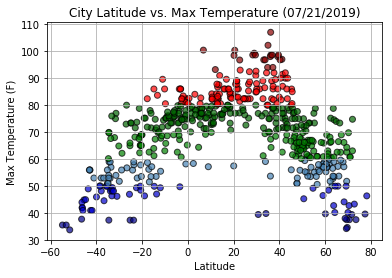

In [9]:
#Temperature
mo = city_weather_df["Date_Time"][0].strftime("%m")
day = city_weather_df["Date_Time"][0].strftime("%d")
yr = city_weather_df["Date_Time"][0].strftime("%Y")

date_run = "(" + mo + "/" + day + "/" + yr + ")"

colors = pd.DataFrame(city_weather_df, columns=["Max_Temp (F)"])
t = []
for temp in Max_Temp:
    if float(temp) > 93.00:
        t.append('darkred')
    elif float(temp) >80.00:
        t.append('red')
    elif float(temp) > 70.00:
        t.append('darkgreen')
    elif float(temp) > 60.00:
        t.append('green')
    elif float(temp) > 50.00:
        t.append('steelblue')
    elif float(temp) > 40.00:
        t.append('mediumblue')
    elif float(temp) > 30.00:
        t.append('darkblue')
    else:
        t.append('midnightblue')

plt.scatter(city_weather_df["Lat"], city_weather_df["Max_Temp (F)"], marker="o", facecolors=t, alpha=.7, edgecolors="black")

plt.title("City Latitude vs. Max Temperature " + date_run)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

max_temp_file_name = yr + mo + day + " City_Lat_vs_Max_Temp.png"
plt.savefig('output_data/' + max_temp_file_name) 

plt.show()

#### Latitude vs. Humidity Plot

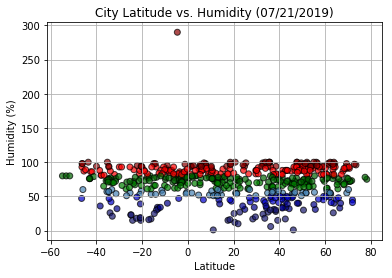

In [10]:
#Humidity
colors = pd.DataFrame(city_weather_df, columns=["Humidity"])
h = []
for hum in Humidity:
    if int(hum) > 93.00:
        h.append('darkred')
    elif int(hum) >80.00:
        h.append('red')
    elif int(hum) > 70.00:
        h.append('darkgreen')
    elif int(hum) > 60.00:
        h.append('green')
    elif int(hum) > 50.00:
        h.append('steelblue')
    elif int(hum) > 40.00:
        h.append('mediumblue')
    elif int(hum) > 30.00:
        h.append('darkblue')
    else:
        h.append('midnightblue')

plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], marker="o", facecolors=h, alpha=.7, edgecolors="black")

plt.title("City Latitude vs. Humidity " + date_run)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()


humidity_file_name = yr + mo + day + " City_Lat_vs_Humidity.png"
plt.savefig('output_data/' + humidity_file_name) 

plt.show()

#### Latitude vs. Cloudiness Plot

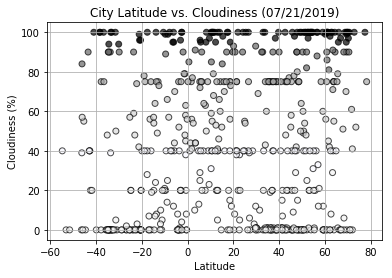

In [11]:
#Cloudiness
colors = pd.DataFrame(city_weather_df, columns=["Cloudiness"])
cld = []
for clouds in Cloudiness:
    if int(clouds) > 93:
        cld.append('black')
    elif int(clouds) > 80:
        cld.append('dimgray')
    elif int(clouds) > 70:
        cld.append('darkgray')
    elif int(clouds) > 60:
        cld.append('silver')
    elif int(clouds) > 50:
        cld.append('lightgray')
    elif int(clouds) > 40:
        cld.append('gainsboro')
    elif int(clouds) > 30:
        cld.append('ghostwhite')
    else:
        cld.append('whitesmoke')

plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], marker="o", facecolors=cld, alpha=.7, edgecolors="black")

plt.title("City Latitude vs. Cloudiness " + date_run)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

cloudiness_file_name = yr + mo + day + " City_Lat_vs_Cloudiness.png"
plt.savefig('output_data/' + cloudiness_file_name) 

plt.show()

#### Latitude vs. Wind Speed Plot

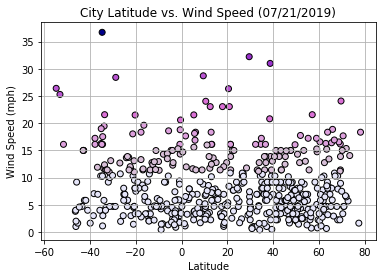

Average Wind Speed: 8.35
Median Wind Speed:6.93
Standard Deviation Wind Speed:5.7


In [13]:
#Wind Speed
colors = pd.DataFrame(city_weather_df, columns=["Wind_Speed"])
ws = []
for speed in Wind_Speed:
    if float(speed) > 35:
        ws.append('darkblue')
    elif float(speed) > 30:
        ws.append('darkorchid')
    elif float(speed) > 25:
        ws.append('mediumorchid')
    elif float(speed) > 20:
        ws.append('orchid')
    elif int(speed) > 15:
        ws.append('plum')
    elif int(speed) > 10:
        ws.append('thistle')
    else:
        ws.append('lavender')

plt.scatter(city_weather_df["Lat"], city_weather_df["Wind_Speed"], marker="o", facecolors=ws, edgecolors="black")

plt.title("City Latitude vs. Wind Speed " + date_run)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
windspeed_file_name = yr + mo + day + " City_Lat_vs_Windspeed.png"
plt.savefig('output_data/' + windspeed_file_name) 
plt.show()
wind_speed_sum = city_weather_df["Wind_Speed"].sum()
wind_speed_num = len(city_weather_df["Wind_Speed"])
wind_speed_avg = round(wind_speed_sum / wind_speed_num,2)
wind_speed_med = np.median(city_weather_df["Wind_Speed"])
wind_speed_std = round(np.std(city_weather_df["Wind_Speed"]),2)
print("Average Wind Speed: " + str(wind_speed_avg))
print("Median Wind Speed:" + str(wind_speed_med))
print("Standard Deviation Wind Speed:" + str(wind_speed_std))